<a href="https://colab.research.google.com/github/mofanchang/Houseprice/blob/main/house_price%E6%88%BF%E5%83%B9%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**定義問題:用近三年房價資料做預測**
根據政府實價登錄網房價作分析
下載近三年中正區房價

地段-local,
社區-com,
交易日期-date,
總價=totalprice,
單價=unit price,
總面=total area,
主建物佔比=ratio,
型態=type,
屋齡=age,
樓別=floor,
購買樓層=Buyfloor, 
總樓層=totalfloor,
建物現況=Buildingstatus,
管理組織=Manage,
電梯,
主要用途=Usage

In [225]:
from google.colab import drive
drive.mount('/content/MyGoogleDrive')

Drive already mounted at /content/MyGoogleDrive; to attempt to forcibly remount, call drive.mount("/content/MyGoogleDrive", force_remount=True).


In [226]:
import pandas as pd
df=pd.read_csv('/content/MyGoogleDrive/MyDrive/Colab Notebooks/house price/chungchan-houseprice.csv')
df.head()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,Unnamed: 12,Unnamed: 13
0,112/01/08,1180.0,56.2,21.01,91.29%,公寓(5樓含以下無電梯),39.0,三層/五層,3房1廳1衛,無,無,住家用,NaN,NaN
1,112/01/05,1310.0,118.8,11.03,53.20%,住宅大樓(11層含以上有電梯),17.0,十二層/十五層,1房1廳1衛,有,有,辦公用,NaN,NaN
2,111/12/25,1800.0,78.7,22.87,100.00%,公寓(5樓含以下無電梯),55.0,四層/四層,2房1廳2衛,無,無,NaN,NaN,NaN
3,111/12/23,2420.0,52.5,46.10,100.00%,公寓(5樓含以下無電梯),55.0,四層/四層,5房2廳2衛,無,無,NaN,NaN,NaN
4,111/12/23,372.6,81.1,4.59,80.91%,華廈(10層含以下有電梯),45.0,四層/十層,4房2廳2衛,有,有,NaN,NaN,NaN


In [227]:
df['usage'].value_counts()

住家用    1009
商業用     222
其他       85
辦公用      81
住商用      12
工業用       1
Name: usage, dtype: int64

In [228]:
df['elevator'].value_counts()

有    1008
無     492
Name: elevator, dtype: int64

In [229]:
df['manage'].value_counts()

有    846
無    654
Name: manage, dtype: int64

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1500 non-null   object 
 1   totalprice      1500 non-null   float64
 2   unit price      1500 non-null   float64
 3   total area      1500 non-null   float64
 4   ratio           1455 non-null   object 
 5   type            1500 non-null   object 
 6   age             1253 non-null   float64
 7   floor           1500 non-null   object 
 8   buildingstatus  1345 non-null   object 
 9   manage          1500 non-null   object 
 10  elevator        1500 non-null   object 
 11  usage           1410 non-null   object 
 12  Unnamed: 12     0 non-null      float64
 13  Unnamed: 13     0 non-null      float64
dtypes: float64(6), object(8)
memory usage: 164.2+ KB


In [231]:
df['buildingstatus'].value_counts()

1房1廳1衛    288
3房2廳2衛    216
2房2廳1衛    112
2房1廳1衛    112
4房2廳2衛     88
         ... 
6房2廳2衛      1
2房2廳3衛      1
6房0廳1衛      1
6房1廳4衛      1
4房0廳0衛      1
Name: buildingstatus, Length: 95, dtype: int64

In [232]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [233]:
le=LabelEncoder()
for col in df[['type','manage','elevator','usage']]:
  df[col] = le.fit_transform(df[col])


In [234]:
df.head()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,Unnamed: 12,Unnamed: 13
0,112/01/08,1180.0,56.2,21.01,91.29%,1,39.0,三層/五層,3房1廳1衛,1,1,1,NaN,NaN
1,112/01/05,1310.0,118.8,11.03,53.20%,0,17.0,十二層/十五層,1房1廳1衛,0,0,5,NaN,NaN
2,111/12/25,1800.0,78.7,22.87,100.00%,1,55.0,四層/四層,2房1廳2衛,1,1,6,NaN,NaN
3,111/12/23,2420.0,52.5,46.10,100.00%,1,55.0,四層/四層,5房2廳2衛,1,1,6,NaN,NaN
4,111/12/23,372.6,81.1,4.59,80.91%,2,45.0,四層/十層,4房2廳2衛,0,0,6,NaN,NaN


In [235]:
df.shape

(1500, 14)

In [236]:
df.columns

Index(['date', 'totalprice', 'unit price', 'total area', 'ratio', 'type',
       'age', 'floor', 'buildingstatus', 'manage', 'elevator', 'usage',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [237]:
df.describe()

,totalprice,unit price,total area,type,age,manage,elevator,usage,Unnamed: 12,Unnamed: 13
count,1500.000000,1500.000000,1500.000000,1500.000000,1253.000000,1500.000000,1500.000000,1500.000000,0.0,0.0
mean,2189.756400,74.577333,28.420087,0.924000,31.747007,0.436000,0.328000,1.862667,NaN,NaN
std,3347.005572,31.300678,37.421731,0.877157,15.530368,0.496052,0.469641,1.511289,NaN,NaN
min,6.100000,0.000000,0.050000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,1100.000000,57.875000,13.810000,0.000000,17.000000,0.000000,0.000000,1.000000,NaN,NaN
50%,1662.500000,73.000000,23.250000,1.000000,35.000000,0.000000,0.000000,1.000000,NaN,NaN
75%,2496.250000,89.300000,35.432500,2.000000,44.000000,1.000000,1.000000,3.000000,NaN,NaN
max,92112.100000,382.400000,1023.470000,3.000000,66.000000,1.000000,1.000000,6.000000,NaN,NaN


In [238]:
# df[['房','廳','衛']]=df['buildingstatus'].str.extract('(\d+)房(\d+)廳(\d+)衛',expand=False).dropna().astype('int64')

df[['bedroom', 'hall', 'bathroom']] = df['buildingstatus'].str.extract('(\d+)房(\d+)廳(\d+)衛')
df.head()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,Unnamed: 12,Unnamed: 13,bedroom,hall,bathroom
0,112/01/08,1180.0,56.2,21.01,91.29%,1,39.0,三層/五層,3房1廳1衛,1,1,1,NaN,NaN,3,1,1
1,112/01/05,1310.0,118.8,11.03,53.20%,0,17.0,十二層/十五層,1房1廳1衛,0,0,5,NaN,NaN,1,1,1
2,111/12/25,1800.0,78.7,22.87,100.00%,1,55.0,四層/四層,2房1廳2衛,1,1,6,NaN,NaN,2,1,2
3,111/12/23,2420.0,52.5,46.10,100.00%,1,55.0,四層/四層,5房2廳2衛,1,1,6,NaN,NaN,5,2,2
4,111/12/23,372.6,81.1,4.59,80.91%,2,45.0,四層/十層,4房2廳2衛,0,0,6,NaN,NaN,4,2,2


In [239]:
df[['buyfloor']] = df['floor'].str.extract('(\d+)層')
df.head()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,Unnamed: 12,Unnamed: 13,bedroom,hall,bathroom,buyfloor
0,112/01/08,1180.0,56.2,21.01,91.29%,1,39.0,三層/五層,3房1廳1衛,1,1,1,NaN,NaN,3,1,1,NaN
1,112/01/05,1310.0,118.8,11.03,53.20%,0,17.0,十二層/十五層,1房1廳1衛,0,0,5,NaN,NaN,1,1,1,NaN
2,111/12/25,1800.0,78.7,22.87,100.00%,1,55.0,四層/四層,2房1廳2衛,1,1,6,NaN,NaN,2,1,2,NaN
3,111/12/23,2420.0,52.5,46.10,100.00%,1,55.0,四層/四層,5房2廳2衛,1,1,6,NaN,NaN,5,2,2,NaN
4,111/12/23,372.6,81.1,4.59,80.91%,2,45.0,四層/十層,4房2廳2衛,0,0,6,NaN,NaN,4,2,2,NaN


In [240]:
df[['buyfloor', 'totalfloor']] = df['floor'].str.split('/', expand=True)
df['buyfloor'] = df['buyfloor'].str.extract('(\d+)')
df['totalfloor'] = df['totalfloor'].str.extract('(\d+)')
df.head()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,Unnamed: 12,Unnamed: 13,bedroom,hall,bathroom,buyfloor,totalfloor
0,112/01/08,1180.0,56.2,21.01,91.29%,1,39.0,三層/五層,3房1廳1衛,1,1,1,NaN,NaN,3,1,1,NaN,NaN
1,112/01/05,1310.0,118.8,11.03,53.20%,0,17.0,十二層/十五層,1房1廳1衛,0,0,5,NaN,NaN,1,1,1,NaN,NaN
2,111/12/25,1800.0,78.7,22.87,100.00%,1,55.0,四層/四層,2房1廳2衛,1,1,6,NaN,NaN,2,1,2,NaN,NaN
3,111/12/23,2420.0,52.5,46.10,100.00%,1,55.0,四層/四層,5房2廳2衛,1,1,6,NaN,NaN,5,2,2,NaN,NaN
4,111/12/23,372.6,81.1,4.59,80.91%,2,45.0,四層/十層,4房2廳2衛,0,0,6,NaN,NaN,4,2,2,NaN,NaN


In [241]:
df = df.drop(['Unnamed: 12', 'Unnamed: 13', 'buyfloor', 'totalfloor'], axis=1)

In [242]:
df.head()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,bedroom,hall,bathroom
0,112/01/08,1180.0,56.2,21.01,91.29%,1,39.0,三層/五層,3房1廳1衛,1,1,1,3,1,1
1,112/01/05,1310.0,118.8,11.03,53.20%,0,17.0,十二層/十五層,1房1廳1衛,0,0,5,1,1,1
2,111/12/25,1800.0,78.7,22.87,100.00%,1,55.0,四層/四層,2房1廳2衛,1,1,6,2,1,2
3,111/12/23,2420.0,52.5,46.10,100.00%,1,55.0,四層/四層,5房2廳2衛,1,1,6,5,2,2
4,111/12/23,372.6,81.1,4.59,80.91%,2,45.0,四層/十層,4房2廳2衛,0,0,6,4,2,2


In [243]:
df[['buyfloor', 'totalfloor']] = df['floor'].str.split('/', expand=True)
df.head()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,bedroom,hall,bathroom,buyfloor,totalfloor
0,112/01/08,1180.0,56.2,21.01,91.29%,1,39.0,三層/五層,3房1廳1衛,1,1,1,3,1,1,三層,五層
1,112/01/05,1310.0,118.8,11.03,53.20%,0,17.0,十二層/十五層,1房1廳1衛,0,0,5,1,1,1,十二層,十五層
2,111/12/25,1800.0,78.7,22.87,100.00%,1,55.0,四層/四層,2房1廳2衛,1,1,6,2,1,2,四層,四層
3,111/12/23,2420.0,52.5,46.10,100.00%,1,55.0,四層/四層,5房2廳2衛,1,1,6,5,2,2,四層,四層
4,111/12/23,372.6,81.1,4.59,80.91%,2,45.0,四層/十層,4房2廳2衛,0,0,6,4,2,2,四層,十層


In [244]:
df['buyfloor'].value_counts()

四層          204
二層          173
三層          159
五層          141
六層           98
一層           96
七層           81
十層           62
九層           62
八層           61
十一層          40
全            38
十二層          36
一層,騎樓        33
二層,陽台        17
地下一層         16
四層,陽臺        16
十四層          15
三層,陽臺        14
四層,陽台        13
十三層          11
三層,陽台        11
二層,陽臺        10
二十二層          9
一層,平台         9
十八層           7
十五層           7
五層,陽台         6
一層,露台         5
十六層           5
十七層           5
地下層           4
地下二層          3
一層,平台,騎樓      3
四層,露台         2
三層,露台         2
二十層           2
一層,二層         2
六層,陽台         2
二十四層          1
防空避難室         1
七層,陽台         1
九層,陽臺         1
十二層,陽台        1
一層,地下一層       1
三層,電梯樓梯間      1
七層,通道         1
二十一層          1
一層,走廊         1
一層,停車場        1
三層,四層         1
五層,電梯樓梯間      1
十一層,夾層        1
十一層,陽臺        1
二層,露台         1
一層,電梯樓梯間      1
二十三層          1
六層,陽臺         1
三層,通道         1
Name: buyfloor, dtype: int64

In [245]:
df['totalfloor'].value_counts()

四層      249
五層      211
十二層     195
七層      193
十四層     166
十五層      85
十層       65
十一層      64
六層       62
八層       43
九層       37
二十七層     29
十三層      28
三層       20
二層       12
一層        8
十八層       8
二十二層      7
二十五層      5
十九層       4
二十三層      3
十七層       3
二十一層      2
十六層       1
Name: totalfloor, dtype: int64

In [246]:
def convert_buyfloor(value):
    if value == '一層,騎樓':
        return '一層'
    elif value == '二層,陽臺':
        return '二層'
    elif value == '三層,露台':
        return '三層'
    elif value == '一層,夾層':
        return '一層'
    elif value == '三層,陽臺':
        return '三層'
    elif value == '一層,騎樓,走廊':
        return '一層'
    elif value == '二層,露台':
        return '二層'
    elif value == '七層,陽台':
        return '七層'
    elif value == '一層,騎樓,夾層':
        return '一層'
    elif value == '三層,陽台':
        return '三層'
    elif value == '五層,露台,走廊':
        return '五層'
    elif value == '一層,陽臺':
        return '一層'
    elif value == '三層,通道':
        return '三層'
    elif value == '八層,電梯樓梯間':
        return '八層'
    elif value == '七層,電梯樓梯間':
        return '七層'
    elif value == '一層,地下層':
        return '一層'
    elif value == '二層,露台,走廊':
        return '二層'
    elif value == '十一層,陽臺':
        return '十一層'
    elif value == '五層,露台':
        return '五層'
    elif value == '八層,陽臺':
        return '八層'
    elif value == '七層,陽臺':
        return '七層'
    elif value == '二層,陽台':
        return '二層'
    elif value == '四層,陽臺':
        return '四層'
    elif value == '四層,陽台':
        return '四層'
    elif value == '一層,平台':
        return '一層'
    elif value == '五層,陽台':
        return '五層'
    elif value == '一層,露台':
        return '一層'
    elif value == '一層,平台,騎樓':
        return '一層'
    elif value == '一層,二層':
        return '一層'
    elif value == '四層,露台':
        return '四層'
    elif value == '六層,陽台':
        return '六層'
    elif value == '七層,通道':
        return '七層'
    elif value == '十二層,陽台':
        return '十二層'
    elif value == '九層,陽臺':
        return '九層'
    elif value == '一層,地下一層':
        return '一層'
    elif value == '三層,電梯樓梯間':
        return '三層'
    elif value == '一層,走廊':
        return '一層'
    elif value == '一層,停車場':
        return '一層'
    elif value == '五層,電梯樓梯間':
        return '五層'
    elif value == '十一層,夾層':
        return '十一層'
    elif value == '一層,電梯樓梯間':
        return '一層'
    elif value == '六層,陽臺':
        return '六層'
    elif value == '防空避難室':
        return None
    elif value == '地下二層':
        return None
    elif value == '全':
        return None
    elif value == '地下層':
        return None
    elif value == '三層,四層':
        return None
    elif value == '地下一層':
        return None
    elif value == '七層,八層':
        return None
    elif value == '九層,十層':
        return None
    elif value == '地下一層,見其他登記事項':
        return None
    elif value == '地下層':
        return None
    return value

df['buyfloor'] = df['buyfloor'].apply(lambda x: convert_buyfloor(x))
df.dropna(subset=['buyfloor'], inplace=True)

In [247]:
df.head()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,bedroom,hall,bathroom,buyfloor,totalfloor
0,112/01/08,1180.0,56.2,21.01,91.29%,1,39.0,三層/五層,3房1廳1衛,1,1,1,3,1,1,三層,五層
1,112/01/05,1310.0,118.8,11.03,53.20%,0,17.0,十二層/十五層,1房1廳1衛,0,0,5,1,1,1,十二層,十五層
2,111/12/25,1800.0,78.7,22.87,100.00%,1,55.0,四層/四層,2房1廳2衛,1,1,6,2,1,2,四層,四層
3,111/12/23,2420.0,52.5,46.10,100.00%,1,55.0,四層/四層,5房2廳2衛,1,1,6,5,2,2,四層,四層
4,111/12/23,372.6,81.1,4.59,80.91%,2,45.0,四層/十層,4房2廳2衛,0,0,6,4,2,2,四層,十層


In [248]:
df['buyfloor'].value_counts()

四層      235
二層      201
三層      188
一層      152
五層      148
六層      101
七層       83
九層       63
十層       62
八層       61
十一層      42
十二層      37
十四層      15
十三層      11
二十二層      9
十五層       7
十八層       7
十六層       5
十七層       5
二十層       2
二十三層      1
二十一層      1
二十四層      1
Name: buyfloor, dtype: int64

In [249]:
def convert_to_arabic(cn_num):
    if not isinstance(cn_num, str):
        return cn_num
    unit_dict = {'十': 10}
    num_dict = {'零': 0, '一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9}
    cn_num = cn_num[:-1] # 去掉層字
    result = 0
    temp = 0
    for cn in cn_num:
        if cn in num_dict.keys():
            temp = num_dict[cn]
        elif cn in unit_dict.keys():
            if temp == 0:
                result += unit_dict[cn]
                temp = 1
            else:
                result += temp * unit_dict[cn]
                temp = 0
    result += temp
    return result
df['totalfloor'] = df['totalfloor'].apply(lambda x: convert_to_arabic(x))


In [250]:
def convert_to_arabic(cn_num):
    if not isinstance(cn_num, str):
        return cn_num
    unit_dict = {'十': 10}
    num_dict = {'零': 0, '一': 1, '二': 2, '三': 3, '四': 4, '五': 5, '六': 6, '七': 7, '八': 8, '九': 9}
    cn_num = cn_num[:-1] # 去掉層字
    result = 0
    temp = 0
    for cn in cn_num:
        if cn in num_dict.keys():
            temp = num_dict[cn]
        elif cn in unit_dict.keys():
            if temp == 0:
                result += unit_dict[cn]
                temp = 1
            else:
                result += temp * unit_dict[cn]
                temp = 0
    result += temp
    return result
df['buyfloor'] = df['buyfloor'].apply(lambda x: convert_to_arabic(x))

In [251]:
df.head()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,bedroom,hall,bathroom,buyfloor,totalfloor
0,112/01/08,1180.0,56.2,21.01,91.29%,1,39.0,三層/五層,3房1廳1衛,1,1,1,3,1,1,3,5
1,112/01/05,1310.0,118.8,11.03,53.20%,0,17.0,十二層/十五層,1房1廳1衛,0,0,5,1,1,1,12,15
2,111/12/25,1800.0,78.7,22.87,100.00%,1,55.0,四層/四層,2房1廳2衛,1,1,6,2,1,2,4,4
3,111/12/23,2420.0,52.5,46.10,100.00%,1,55.0,四層/四層,5房2廳2衛,1,1,6,5,2,2,4,4
4,111/12/23,372.6,81.1,4.59,80.91%,2,45.0,四層/十層,4房2廳2衛,0,0,6,4,2,2,4,11


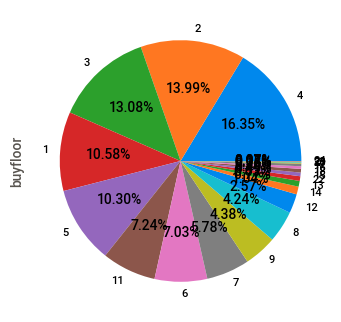

In [252]:
df['buyfloor'].value_counts().plot(kind='pie',autopct='%1.2f%%')

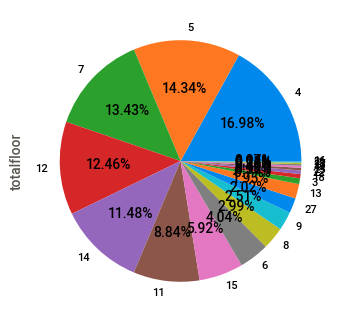

In [253]:
df['totalfloor'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [254]:
df[['year', 'month', 'day']] = df['date'].str.split("/", expand=True)
df['year'] = df['year'].astype(int) + 1911

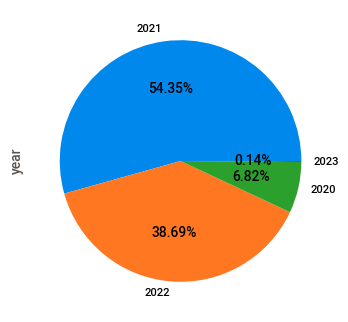

In [255]:
df['year'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [256]:
df.head()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,bedroom,hall,bathroom,buyfloor,totalfloor,year,month,day
0,112/01/08,1180.0,56.2,21.01,91.29%,1,39.0,三層/五層,3房1廳1衛,1,1,1,3,1,1,3,5,2023,01,08
1,112/01/05,1310.0,118.8,11.03,53.20%,0,17.0,十二層/十五層,1房1廳1衛,0,0,5,1,1,1,12,15,2023,01,05
2,111/12/25,1800.0,78.7,22.87,100.00%,1,55.0,四層/四層,2房1廳2衛,1,1,6,2,1,2,4,4,2022,12,25
3,111/12/23,2420.0,52.5,46.10,100.00%,1,55.0,四層/四層,5房2廳2衛,1,1,6,5,2,2,4,4,2022,12,23
4,111/12/23,372.6,81.1,4.59,80.91%,2,45.0,四層/十層,4房2廳2衛,0,0,6,4,2,2,4,11,2022,12,23


In [257]:
df['ratio'] = df['ratio'].str.strip('%').astype(float) / 100

In [258]:
df.head()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,bedroom,hall,bathroom,buyfloor,totalfloor,year,month,day
0,112/01/08,1180.0,56.2,21.01,0.9129,1,39.0,三層/五層,3房1廳1衛,1,1,1,3,1,1,3,5,2023,01,08
1,112/01/05,1310.0,118.8,11.03,0.5320,0,17.0,十二層/十五層,1房1廳1衛,0,0,5,1,1,1,12,15,2023,01,05
2,111/12/25,1800.0,78.7,22.87,1.0000,1,55.0,四層/四層,2房1廳2衛,1,1,6,2,1,2,4,4,2022,12,25
3,111/12/23,2420.0,52.5,46.10,1.0000,1,55.0,四層/四層,5房2廳2衛,1,1,6,5,2,2,4,4,2022,12,23
4,111/12/23,372.6,81.1,4.59,0.8091,2,45.0,四層/十層,4房2廳2衛,0,0,6,4,2,2,4,11,2022,12,23


In [259]:
df = df.drop(['month','day'],axis=1)
df.dropna()

,date,totalprice,unit price,total area,ratio,type,age,floor,buildingstatus,manage,elevator,usage,bedroom,hall,bathroom,buyfloor,totalfloor,year
0,112/01/08,1180.0,56.2,21.01,0.9129,1,39.0,三層/五層,3房1廳1衛,1,1,1,3,1,1,3,5,2023
1,112/01/05,1310.0,118.8,11.03,0.5320,0,17.0,十二層/十五層,1房1廳1衛,0,0,5,1,1,1,12,15,2023
2,111/12/25,1800.0,78.7,22.87,1.0000,1,55.0,四層/四層,2房1廳2衛,1,1,6,2,1,2,4,4,2022
3,111/12/23,2420.0,52.5,46.10,1.0000,1,55.0,四層/四層,5房2廳2衛,1,1,6,5,2,2,4,4,2022
4,111/12/23,372.6,81.1,4.59,0.8091,2,45.0,四層/十層,4房2廳2衛,0,0,6,4,2,2,4,11,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,109/11/12,2250.0,87.2,25.79,0.6971,0,12.0,"一層,騎樓/十二層",0房1廳1衛,0,0,3,0,1,1,1,12,2020
1495,109/11/11,1400.0,57.7,24.25,1.0000,1,45.0,"三層,陽台/四層",3房2廳2衛,1,1,1,3,2,2,3,4,2020
1496,109/11/11,650.0,47.0,13.83,0.8069,1,50.0,二層/四層,2房1廳1衛,1,1,1,2,1,1,2,4,2020
1497,109/11/04,770.0,65.1,11.83,0.6365,2,24.0,四層/七層,1房1廳1衛,1,0,1,1,1,1,4,7,2020


In [260]:
df = df.drop(['date','floor','buildingstatus'],axis=1)
df.dropna()

,totalprice,unit price,total area,ratio,type,age,manage,elevator,usage,bedroom,hall,bathroom,buyfloor,totalfloor,year
0,1180.0,56.2,21.01,0.9129,1,39.0,1,1,1,3,1,1,3,5,2023
1,1310.0,118.8,11.03,0.5320,0,17.0,0,0,5,1,1,1,12,15,2023
2,1800.0,78.7,22.87,1.0000,1,55.0,1,1,6,2,1,2,4,4,2022
3,2420.0,52.5,46.10,1.0000,1,55.0,1,1,6,5,2,2,4,4,2022
4,372.6,81.1,4.59,0.8091,2,45.0,0,0,6,4,2,2,4,11,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,2250.0,87.2,25.79,0.6971,0,12.0,0,0,3,0,1,1,1,12,2020
1495,1400.0,57.7,24.25,1.0000,1,45.0,1,1,1,3,2,2,3,4,2020
1496,650.0,47.0,13.83,0.8069,1,50.0,1,1,1,2,1,1,2,4,2020
1497,770.0,65.1,11.83,0.6365,2,24.0,1,0,1,1,1,1,4,7,2020


In [261]:
df.describe()

,totalprice,unit price,total area,ratio,type,age,manage,elevator,usage,buyfloor,totalfloor,year
count,1437.000000,1437.000000,1437.000000,1430.000000,1437.000000,1226.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000,1437.000000
mean,2077.056367,77.293041,28.045539,0.744490,0.875435,31.641109,0.425191,0.315240,1.788448,5.346555,9.297147,2021.321503
std,2971.898347,28.840370,37.128800,0.177522,0.819633,15.609628,0.494544,0.464773,1.438548,3.889259,4.921254,0.597969
min,24.000000,4.600000,0.860000,0.292600,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2020.000000
25%,1116.000000,59.400000,13.860000,0.594325,0.000000,16.000000,0.000000,0.000000,1.000000,3.000000,5.000000,2021.000000
50%,1672.000000,74.500000,23.210000,0.754550,1.000000,36.000000,0.000000,0.000000,1.000000,4.000000,8.000000,2021.000000
75%,2480.000000,90.000000,35.370000,0.891500,2.000000,44.000000,1.000000,1.000000,2.000000,7.000000,12.000000,2022.000000
max,92112.100000,382.400000,1023.470000,1.000000,2.000000,60.000000,1.000000,1.000000,6.000000,24.000000,27.000000,2023.000000


In [262]:
import matplotlib.pyplot as plt

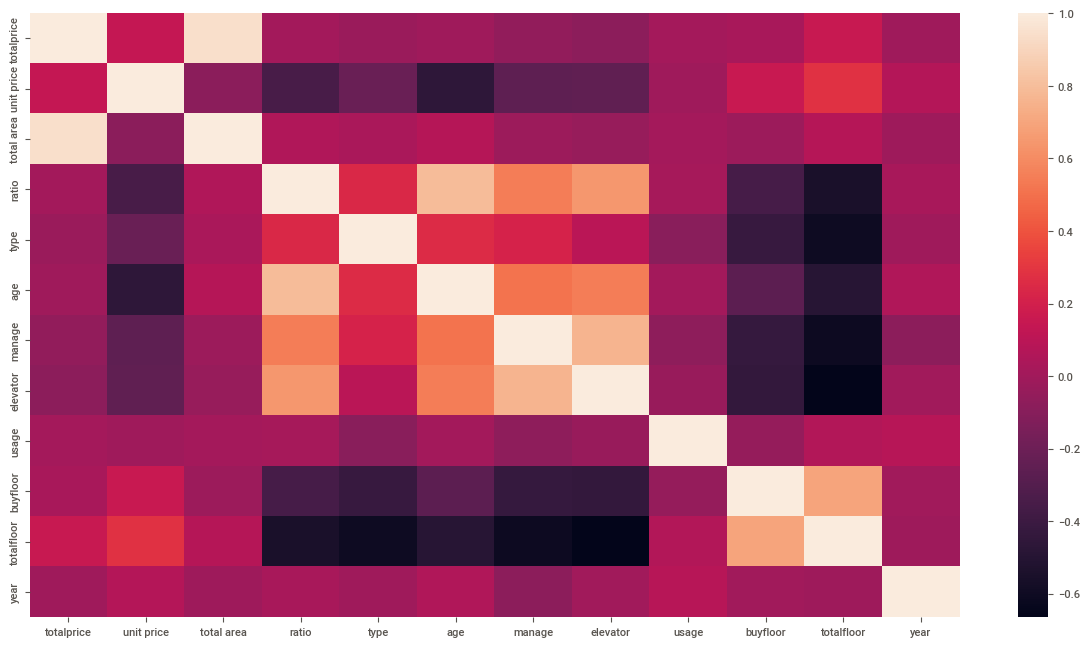

In [263]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr())
plt.show()

In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [265]:
df1=df.to_csv('/content/MyGoogleDrive/MyDrive/Colab Notebooks/house price/house0209.csv')

In [266]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [267]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html(filepath='/content/MyGoogleDrive/MyDrive/Colab Notebooks/house price/house0210.html')

                                             |          | [  0%]   00:00 -> (? left)

Report /content/MyGoogleDrive/MyDrive/Colab Notebooks/house price/house0210.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   totalprice  1437 non-null   float64
 1   unit price  1437 non-null   float64
 2   total area  1437 non-null   float64
 3   ratio       1430 non-null   float64
 4   type        1437 non-null   int64  
 5   age         1226 non-null   float64
 6   manage      1437 non-null   int64  
 7   elevator    1437 non-null   int64  
 8   usage       1437 non-null   int64  
 9   bedroom     1311 non-null   object 
 10  hall        1311 non-null   object 
 11  bathroom    1311 non-null   object 
 12  buyfloor    1437 non-null   int64  
 13  totalfloor  1437 non-null   int64  
 14  year        1437 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 179.6+ KB


補缺失值bedroom ,hall,bathroom,ratio,age

In [269]:
# df['bedroom']=df['bedroom'].fillna(df['bedroom'].mean())
# df['hall']=df['hall'].fillna(df['hall'].mean())
# df['bathroom']=df['bathroom'].fillna(df['bathroom'].mean())
df['ratio']=df['ratio'].fillna(df['ratio'].mean())
df['age']=df['age'].fillna(df['age'].mean())

In [270]:
df['bedroom'].value_counts()

1     376
3     368
2     276
4     138
0     105
5      26
6      13
7       4
9       2
10      1
16      1
8       1
Name: bedroom, dtype: int64

In [271]:
df['hall'].value_counts()

2    615
1    569
0     93
3     28
4      4
5      1
6      1
Name: hall, dtype: int64

In [272]:
df['bathroom'].value_counts()

1    820
2    423
3     34
0     15
4     11
6      4
5      2
9      1
7      1
Name: bathroom, dtype: int64

In [273]:
df['bedroom']=df['bedroom'].fillna('1')
df['hall']=df['hall'].fillna('2')
df['bathroom']=df['bathroom'].fillna('1')

In [274]:
df = df.astype({"bedroom": int, "hall": int, "bathroom": int})

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   totalprice  1437 non-null   float64
 1   unit price  1437 non-null   float64
 2   total area  1437 non-null   float64
 3   ratio       1437 non-null   float64
 4   type        1437 non-null   int64  
 5   age         1437 non-null   float64
 6   manage      1437 non-null   int64  
 7   elevator    1437 non-null   int64  
 8   usage       1437 non-null   int64  
 9   bedroom     1437 non-null   int64  
 10  hall        1437 non-null   int64  
 11  bathroom    1437 non-null   int64  
 12  buyfloor    1437 non-null   int64  
 13  totalfloor  1437 non-null   int64  
 14  year        1437 non-null   int64  
dtypes: float64(5), int64(10)
memory usage: 179.6 KB


In [276]:
x = df.loc[:, ~df.columns.isin(['totalprice', 'unit price','year'])]
y=df['totalprice']
print(x)
print(y)

      total area   ratio  type        age  manage  elevator  usage  bedroom  \
0          21.01  0.9129     1  39.000000       1         1      1        3   
1          11.03  0.5320     0  17.000000       0         0      5        1   
2          22.87  1.0000     1  55.000000       1         1      6        2   
3          46.10  1.0000     1  55.000000       1         1      6        5   
4           4.59  0.8091     2  45.000000       0         0      6        4   
...          ...     ...   ...        ...     ...       ...    ...      ...   
1495       24.25  1.0000     1  45.000000       1         1      1        3   
1496       13.83  0.8069     1  50.000000       1         1      1        2   
1497       11.83  0.6365     2  24.000000       1         0      1        1   
1498       28.78  1.0000     1  31.641109       1         1      1        3   
1499       17.84  0.8296     0   2.000000       0         0      3        1   

      hall  bathroom  buyfloor  totalfloor  
0     

In [277]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [278]:
from sklearn.preprocessing import StandardScaler

In [279]:
# df_std=pd.DataFrame(df,columns=df.columns)
# X_std=df_std.drop(['totalprice'],axis=1)
# y_std=df_std['totalprice']
# df_std=StandardScaler().fit_transform(df_std)

In [280]:
# X_train,X_test,y_train,y_test=train_test_split(X_std,y_std,test_size=0.2)

loss regression

In [281]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# # # Load the housing data
# # data = pd.read_csv("housing.csv")

# # # Split the data into training and testing sets
# # train_data, test_data, train_target, test_target = train_test_split(
# #     data.drop("Price", axis=1), data["Price"], test_size=0.2
# )

# Train the Lasso Regression model,進行訓練
model = Lasso(alpha=0.5)
model.fit(X_train,y_train)




# Make predictions on the test data
y_pred = model.predict(X_test)

In [282]:
model.fit(X_train,y_train)
print('lossegression','\n')
print('Accuracy on traning set: {:.2f}%'.format(model.score(X_train,y_train)*100))
acc=model.score(X_test,y_test)*100
print('Accuracy on testing set: {:.2f}%'.format(acc))

lossegression 

Accuracy on traning set: 91.12%
Accuracy on testing set: 79.35%


GradientBoostingRegressor

In [283]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# # Load the data into a pandas dataframe
# df = pd.read_csv('data.csv')

# # Split the data into training and test sets
# X = df.drop(['target_column'], axis=1)
# y = df['target_column']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()
# gbr.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = gbr.predict(X_test)

# # Calculate the mean squared error
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)


In [284]:
gbr.fit(X_train,y_train)
print('GradientBoostingRegressor','\n')
print('Accuracy on traning set: {:.2f}%'.format(gbr.score(X_train,y_train)*100))
acc=gbr.score(X_test,y_test)*100
print('Accuracy on testing set: {:.2f}%'.format(acc))

GradientBoostingRegressor 

Accuracy on traning set: 97.81%
Accuracy on testing set: 79.83%


LinearRegression

In [285]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print('GradientBoostingRegressor','\n')
print('Accuracy on traning set: {:.2f}%'.format(lr.score(X_train,y_train)*100))
acc=lr.score(X_test,y_test)*100
print('Accuracy on testing set: {:.2f}%'.format(acc))

GradientBoostingRegressor 

Accuracy on traning set: 91.12%
Accuracy on testing set: 79.32%


輸入total area,   ratio,  type,  age,  manage,  elevator,  usage,  
bedroom,hall,  bathroom,  buyfloor,  totalfloor, 

In [291]:
new=[[21,0.5,1,39,1,1,1,3,1,1,3,5]]
v=lr.predict(new)
print('預測結果',v)

預測結果 [1147.709433]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
